In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier   #1vs1 & 1vsRest Classifiers
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
df = pd.read_csv('iris.csv',  sep=',')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Информация об атрибутах:
   1. длина чашелистика в см
   2. ширина чашелистика в см
   3. длина лепестка в см
   4. ширина лепестка в см
   5. класс:
      * Ирис Сетоса
      * Ирис разноцветный
      * Ирис Вирджич

In [5]:
pass_data=df.drop_duplicates(keep='first') #удаление повторяющихся строк
pass_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


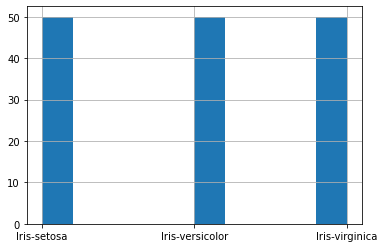

In [6]:
k = df['species'].hist()
fig = k.get_figure()

In [7]:
import seaborn as sns

sepal_length = pass_data["sepal_length"]
sepal_width = pass_data["sepal_width"]
petal_length = pass_data["petal_length"]
petal_width = pass_data["petal_width"]
species = pass_data["species"]

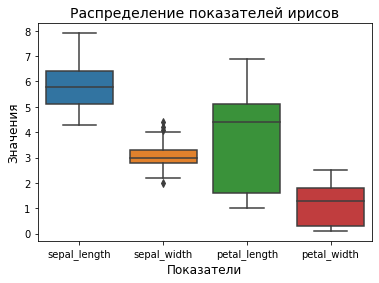

In [8]:
df = pd.DataFrame(data=pass_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df));
boxplot.axes.set_title("Распределение показателей ирисов", fontsize=14)
boxplot.set_xlabel("Показатели", fontsize=12)
boxplot.set_ylabel("Значения", fontsize=12);

In [9]:
df.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [10]:
df_2 = pd.DataFrame()
for column in pass_data.columns.values.tolist()[:4]:
    df_2[column]=(pass_data[column]-pass_data[column].min())\
    /(pass_data[column].max()-pass_data[column].min())
df_2['species']=pass_data['species']
df_2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


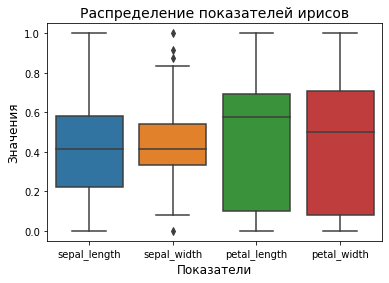

In [11]:
h = pd.DataFrame(data=df_2, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(h));
boxplot.axes.set_title("Распределение показателей ирисов", fontsize=14)
boxplot.set_xlabel("Показатели", fontsize=12)
boxplot.set_ylabel("Значения", fontsize=12);

In [12]:
x = pd.DataFrame(data=df_2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [13]:
y = pd.Series(pass_data['species'])
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [14]:
from sklearn import preprocessing 

iris_object = df_2.select_dtypes(include=[object])
le = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()  
df_2['species']= label_encoder.fit_transform(df_2['species']) 

In [15]:
df_2

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [16]:
y = df_2['species']

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32

In [18]:
corr = x.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


In [19]:
x.shape, y.shape #кол-во объектов, кол-во признаков (в икс)

((147, 4), (147,))

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=17) #размер тестовой выборки 30%

In [22]:
x_train.shape, x_valid.shape

((102, 4), (45, 4))

In [23]:
first_tree = DecisionTreeClassifier(random_state=17)

In [24]:
np.mean(cross_val_score(first_tree, x_train, y_train, cv=5)) 
#средняя доля верных ответов на кросс-валидации (перекрестная проверка)

0.96

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
first_knn = KNeighborsClassifier()

In [27]:
np.mean(cross_val_score(first_knn, x_train, y_train, cv=5)) 
#средняя доля верных ответов на кросс-валидации

0.9604761904761905

#### настраиваем гиперпараметры дерева и ближайших соседей

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
tree_params = {'max_depth': np.arange(1, 11)} #словарь параметров дерева (макс глубина)

In [30]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5) #перебор по решетке дерева

In [31]:
%%time
tree_grid.fit(x_train, y_train) #выполняется кросс-валидация

CPU times: total: 250 ms
Wall time: 249 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [32]:
treecv = tree_grid.fit(x_train, y_train)

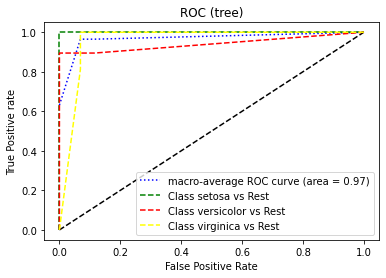

In [33]:
#ROC tree
fpr = {}
tpr = {}
roc_auc = {}
resd = treecv.predict_proba(x_valid)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_valid, resd[:,i], pos_label=i)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="blue",
    linestyle=":",
)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class virginica vs Rest')

plt.title('ROC (tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [59]:
y_valid

29     0
16     0
94     1
68     1
55     1
109    2
139    2
122    2
69     1
83     1
145    2
19     0
144    2
121    2
28     0
50     1
80     1
57     1
75     1
100    2
60     1
0      0
72     1
118    2
88     1
123    2
11     0
9      0
132    2
91     1
96     1
54     1
35     0
39     0
143    2
71     1
101    2
77     1
119    2
79     1
127    2
141    2
82     1
23     0
105    2
Name: species, dtype: int32

In [58]:
fpr

{0: array([0., 0., 1.]),
 1: array([0.        , 0.03846154, 1.        ]),
 2: array([0.        , 0.06896552, 1.        ]),
 'macro': array([0.        , 0.03846154, 0.06896552, 1.        ])}

In [57]:
resd

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
 

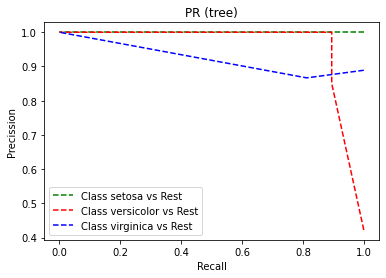

In [34]:
#PR tree
p = {}
r = {}

for i in range(3):
    p[i], r[i], _ = precision_recall_curve(y_valid, resd[:,i], pos_label=i)


plt.plot(r[0], p[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(r[2], p[2], linestyle='--',color='blue', label='Class virginica vs Rest')

plt.title('PR (tree)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')

In [35]:
tree_grid.best_score_, tree_grid.best_params_ #лучшее качество на кросс-валидации, лучшее сочетание параметров(макс глубина)

(0.96, {'max_depth': 3})

In [36]:
knn_params = {'n_neighbors': [1,2,3,4]} #словарь параметров (число ближайших соседей)

In [37]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [38]:
%%time
knn_grid.fit(x_train, y_train)

CPU times: total: 219 ms
Wall time: 199 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4]})

In [39]:
knncv = knn_grid.fit(x_train, y_train)

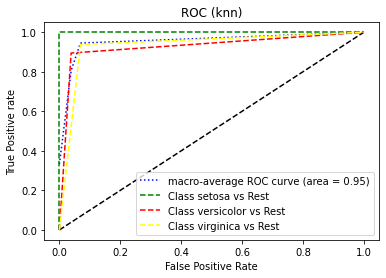

In [40]:
#ROC knn
fpr = {}
tpr = {}
roc_auc = {}
resk = knncv.predict_proba(x_valid)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_valid, resk[:,i], pos_label=i)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="blue",
    linestyle=":",
)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class virginica vs Rest')

plt.title('ROC (knn)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

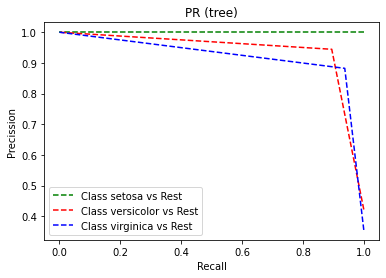

In [41]:
#PR knn
p = {}
r = {}

for i in range(3):
    p[i], r[i], _ = precision_recall_curve(y_valid, resk[:,i], pos_label=i)


plt.plot(r[0], p[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(r[2], p[2], linestyle='--',color='blue', label='Class virginica vs Rest')

plt.title('PR (tree)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')

In [42]:
knn_grid.best_score_, knn_grid.best_params_ 
#лучшее качество на кросс-валидации, лучшее сочетание параметров(число ближайших соседей)

(0.9804761904761905, {'n_neighbors': 1})

In [43]:
tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=17)

In [44]:
tree_valid_pred = tree_grid.predict(x_valid) #прогноз дерева на отложенной выборке

In [45]:
knn_valid_pred = knn_grid.predict(x_valid) #прогноз ближ соседей на отложенной выборке

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_valid, tree_valid_pred) #доля верных ответов между реальными метками на отложенной выборке и прогнозами

0.9555555555555556

In [48]:
accuracy_score(y_valid, knn_valid_pred) #доля верных ответов между реальными метками на отложенной выборке и прогнозами

0.9333333333333333

In [49]:
model = SVC(gamma='scale',random_state=0) #SVC-модель
ovo = OneVsOneClassifier(model) # классификатор один-против-всех
ovo.fit(x_train, y_train) # подгоняем модель к обучающим данным
ovo_pred = ovo.predict(x_valid) #прогноз на отложенной выборке
#Добавление прогнозов в тестовый набор данных
ovo_df = x_valid.copy()
ovo_df.insert(4,"Actual",y_valid, True)
ovo_df.insert(5,"Predicted",ovo_pred, True)

In [50]:
#Inspect Test Dataset
ovo_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Actual,Predicted
29,0.111111,0.500000,0.101695,0.041667,0,0
16,0.305556,0.791667,0.050847,0.125000,0,0
94,0.361111,0.291667,0.542373,0.500000,1,1
68,0.527778,0.083333,0.593220,0.583333,1,1
55,0.388889,0.333333,0.593220,0.500000,1,1


In [51]:
treeovo = ovo.fit(x_train, y_train)

In [52]:
accuracy_score(y_valid, ovo_pred) # Точность

0.9555555555555556

In [53]:
ovr = OneVsRestClassifier(model) # классификатор все-против-всех
ovr.fit(x_train, y_train) # подгоняем модель к обучающим данным
ovr_pred = ovr.predict(x_valid) #прогноз на отложенной выборке
#Добавление прогнозов в тестовый набор данных
ovr_df = x_valid.copy()
ovr_df.insert(4,"Actual",y_valid, True)
ovr_df.insert(5,"Predicted",ovr_pred, True)

In [54]:
#Inspect
ovr_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Actual,Predicted
29,0.111111,0.500000,0.101695,0.041667,0,0
16,0.305556,0.791667,0.050847,0.125000,0,0
94,0.361111,0.291667,0.542373,0.500000,1,1
68,0.527778,0.083333,0.593220,0.583333,1,1
55,0.388889,0.333333,0.593220,0.500000,1,1


In [55]:
accuracy_score(y_valid, ovr_pred) #Точность 

0.9555555555555556